In [182]:
def logistic_map(initial, r, num_iter, plot=True):
    import matplotlib.pyplot as plt
    import numpy as np
    history = [float(initial)]
    for i in range(num_iter):
        x = r * history[-1] * (1 - history[-1])
        history.append(x)
    if plot:
        plt.plot(history, ls='', marker='o')
        plt.show()
    return history

In [105]:
def logistic_map_int(initial, r, capacity, num_iter, plot=True):
    import matplotlib.pyplot as plt
    history = [int(initial)]
    for i in range(num_iter):
        x = int(r * history[-1] * (1 - history[-1]/int(capacity)))
        history.append(x)
    if plot:
        plt.plot(history, ls='',marker='o')
        plt.show()
    return history

In [57]:
def logistic_bifurcation_map(initial, start, end, step_size, iterations, steady_criterion):
    import numpy as np
    from collections import OrderedDict
    import matplotlib.pyplot as plt
    r_point_space = np.arange(start, end,step_size)
    my_map = OrderedDict()
    for r in r_point_space:
        fixed = set(logistic_map(initial, r, iterations, plot=False)[steady_criterion:])
        my_map.update({r : fixed})
    plt.figure(figsize=(50,40))
    plt.rcParams.update({'font.size': 32})
    for keys in my_map:
        x = keys
        y = list(my_map[keys])
        plt.plot([x] * len(y), y, ls='', marker=',', alpha=0.25, color='b')
    plt.show()

In [156]:
def logistic_bifurcation_map_int(initial, start, end, step_size, iterations, steady_criterion, capacity):
    import numpy as np
    from collections import OrderedDict
    import matplotlib.pyplot as plt
    from matplotlib.ticker import LinearLocator
    r_point_space = np.arange(start, end,step_size)
    my_map = OrderedDict()
    for r in r_point_space:
        fixed = set(logistic_map(initial, r, iterations, plot=False)[steady_criterion:])
        my_map.update({r : fixed})
    my_map_int = OrderedDict()
    for r in r_point_space:
        fixed_int = set(logistic_map_int(initial * capacity, r, capacity, iterations, plot=False)[steady_criterion:])
        my_map_int.update({r : fixed_int})
    fig, ax = plt.subplots(1, figsize=(50,40))
    plt.rcParams.update({'font.size': 32})
    ax.set_xlim(start,end)
    ax.set_ylim(0,1)
    ax.set_yticks(np.arange(0,1,1/capacity))
    ax.grid(axis = 'y')
    for keys in my_map:
        x = keys
        y = list(my_map[keys])
        plt.plot([x] * len(y), y, ls='', marker=',', alpha=1, color='b')
    for keys in my_map_int:
        x = keys
        y = list(np.array(list(my_map_int[keys]))/capacity)
        plt.plot([x] * len(y), y, ls='-', marker=',', alpha=0.25, color='r')        
    plt.show()

In [189]:
def logistic_bifurcation_map_period(initial, start, end, step_size, iterations, steady_criterion):
    import numpy as np
    from collections import OrderedDict
    import matplotlib.pyplot as plt
    r_point_space = np.arange(start, end,step_size)
    my_map = OrderedDict()
    for r in r_point_space:
        fixed = set(logistic_map(initial, r, iterations, plot=False)[steady_criterion:])
        my_map.update({r : fixed})
    plt.figure(figsize=(50,40))
    plt.rcParams.update({'font.size': 32})
    for keys in my_map:
        x = keys
        y = list(my_map[keys])
        plt.plot([x] * len(y), y, ls='', marker='o', alpha=0.5, color='b')
    i = 1
    list_of_keys = list(my_map.keys())
    list_of_values = list(my_map.values())
    bif_list=[]
    while i < len(list_of_keys):
        if len(list_of_values[i]) > len(list_of_values[i-1]) and len(list_of_values[i+1]) > len(list_of_values[i-1]):
            plt.axvline(list_of_keys[i], color='g')
            bif_list.append(list_of_keys[i])
        i += 1
    return bif_list        
    plt.show()

[2.4000000000000004, 2.7, 3.3000000000000003, 3.6]

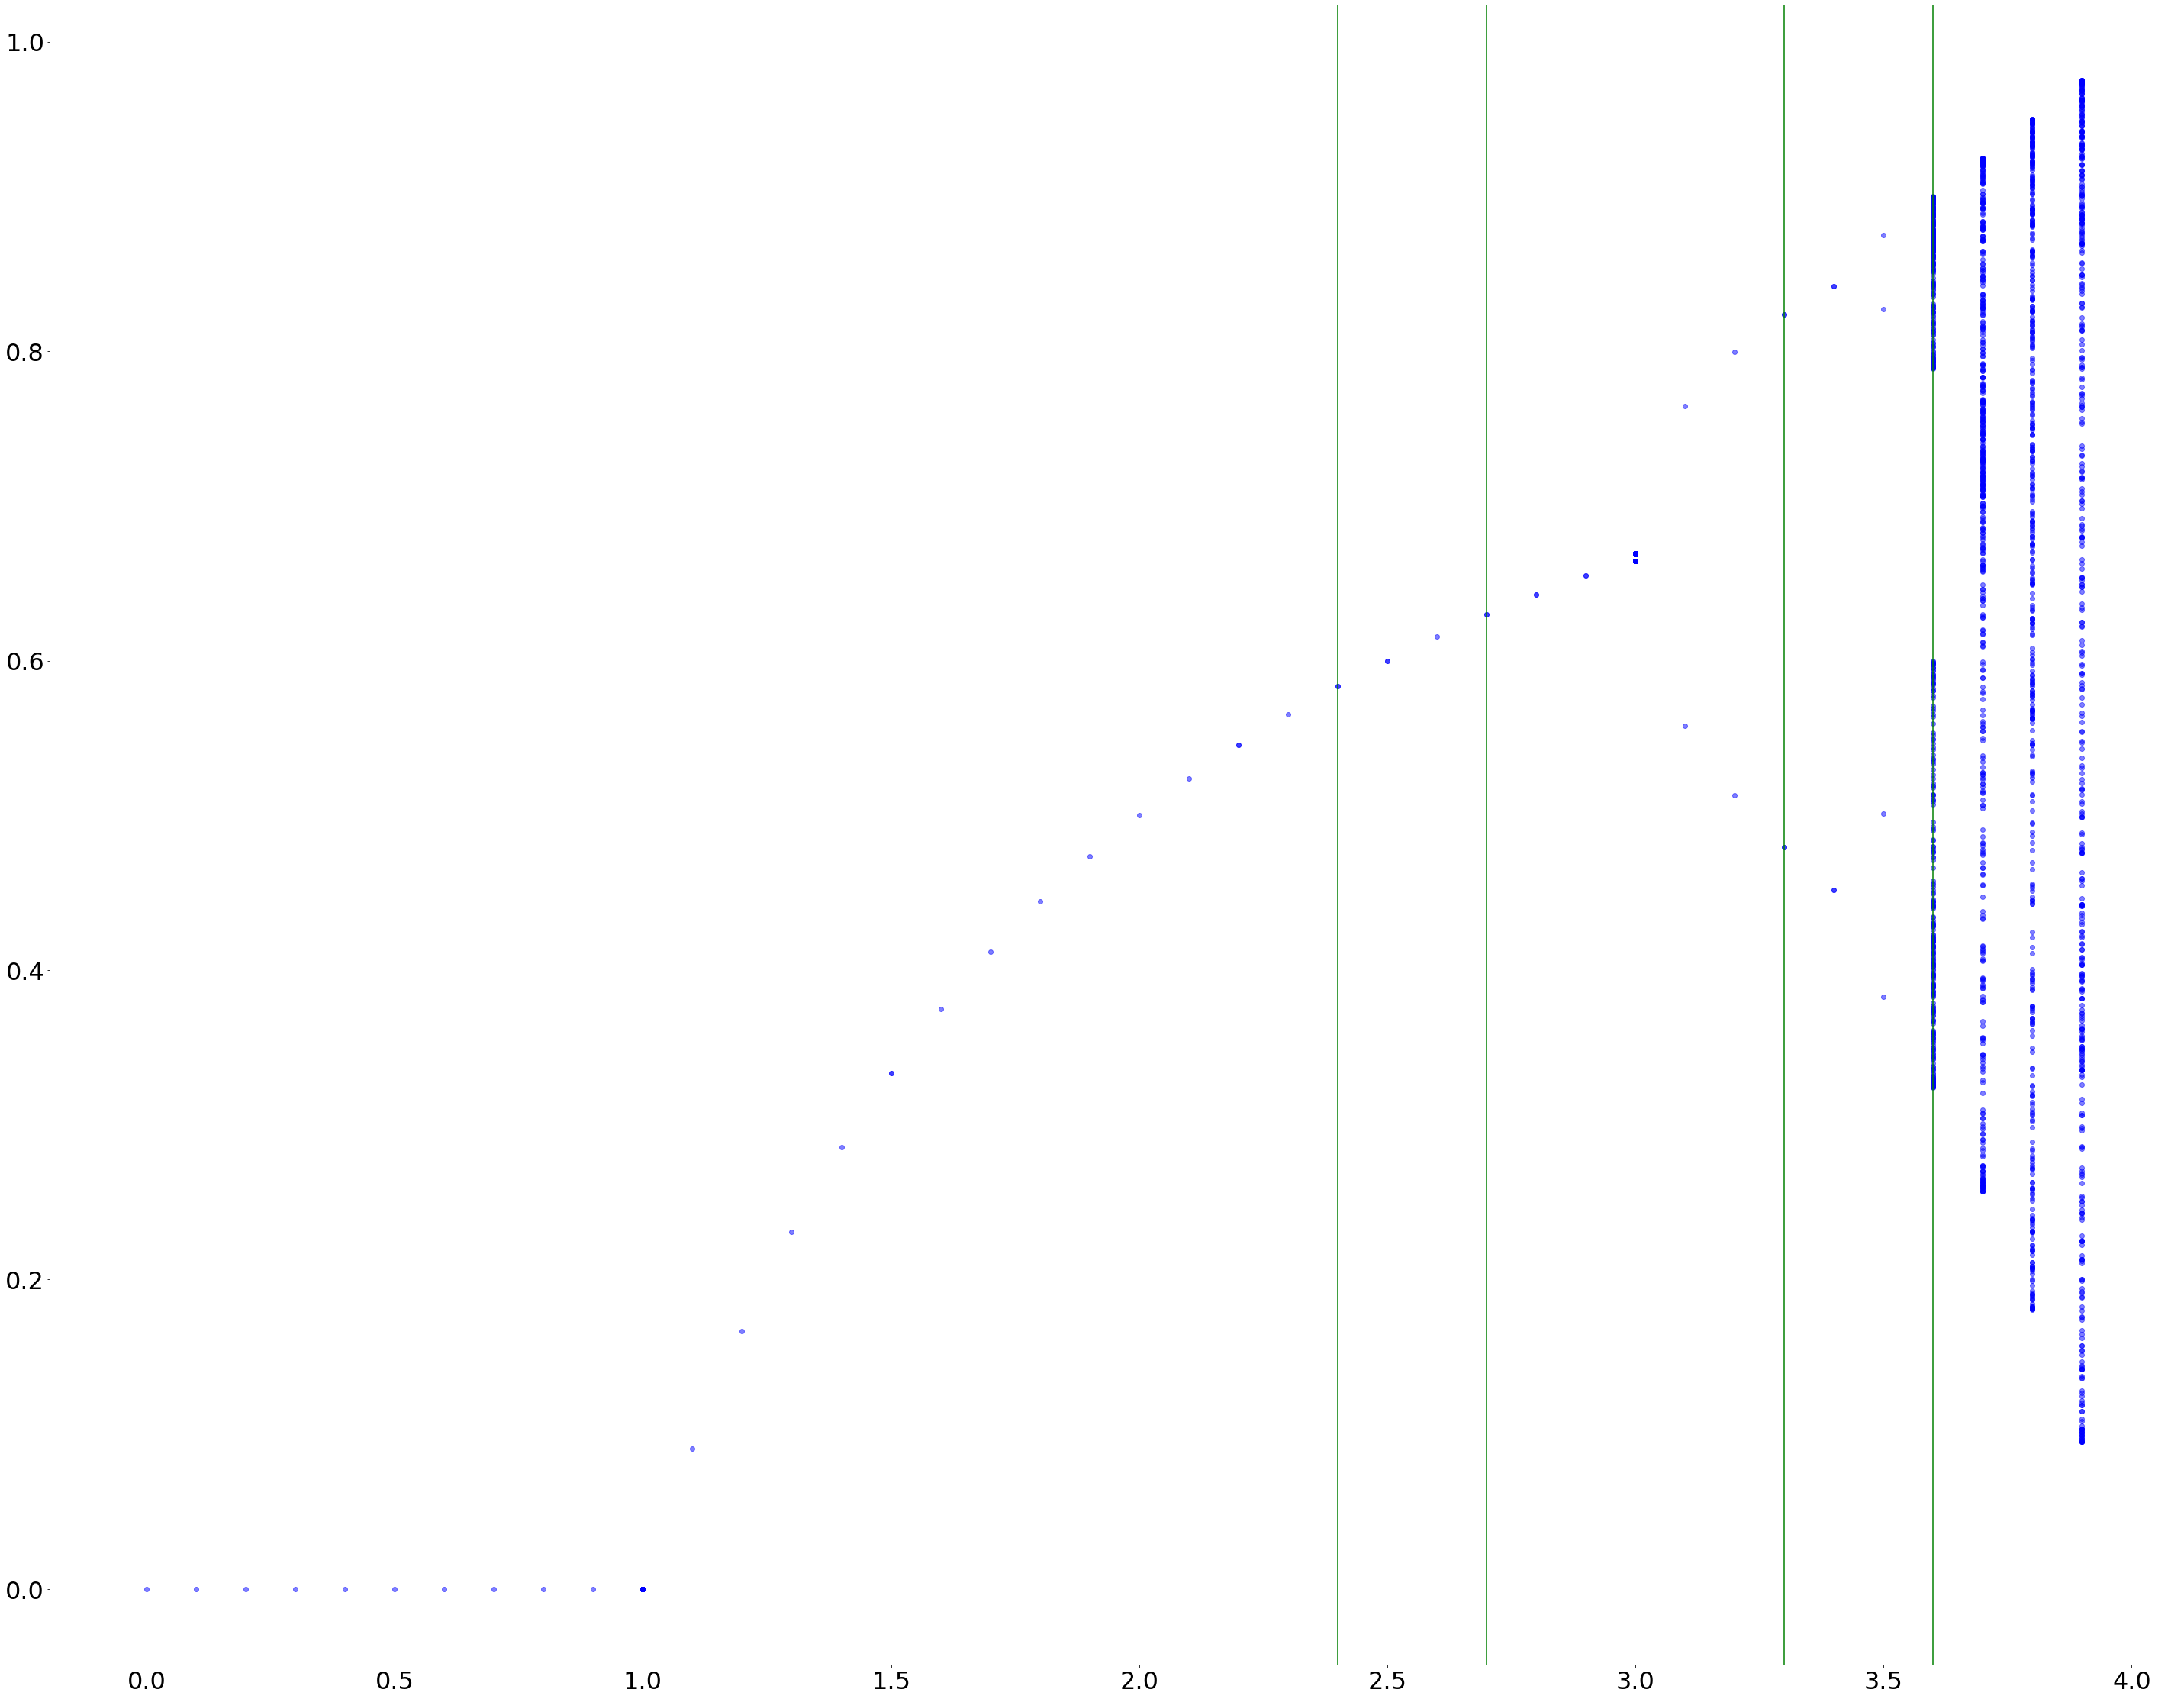

In [190]:
logistic_bifurcation_map_period(0.2, 0, 4, 0.1, 10000, 9500)

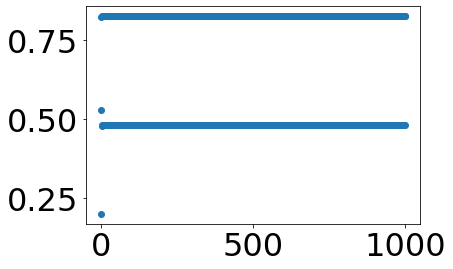

[0.2,
 0.528,
 0.8224127999999999,
 0.4819649551073281,
 0.8239266326138736,
 0.4787360710553407,
 0.8235078895752602,
 0.4796307297624521,
 0.8236308063389662,
 0.4793682339216887,
 0.8235952897540165,
 0.47944409188174647,
 0.8236056003167319,
 0.47942207096403694,
 0.82360261116075,
 0.4794284551648167,
 0.8236034780922104,
 0.47942660358986033,
 0.8236032266884991,
 0.47942714053341323,
 0.8236032995961147,
 0.4794269848186739,
 0.8236032784529514,
 0.4794270299758552,
 0.8236032845844725,
 0.4794270168802649,
 0.8236032828063318,
 0.4794270206779853,
 0.8236032833219925,
 0.4794270195766466,
 0.823603283172451,
 0.47942701989603453,
 0.8236032832158181,
 0.4794270198034119,
 0.8236032832032416,
 0.4794270198302726,
 0.8236032832068888,
 0.479427019822483,
 0.823603283205831,
 0.4794270198247423,
 0.8236032832061377,
 0.4794270198240871,
 0.8236032832060488,
 0.479427019824277,
 0.8236032832060748,
 0.47942701982422153,
 0.8236032832060672,
 0.47942701982423763,
 0.8236032832060693

In [191]:
logistic_map(0.2, 3.3, 1000, plot=True)